# <span style="color:red">Attractor analysis with scBONITA</span>

## <span style="color:blue">Step 0: You will need:</span>

- The results of an scBonita rule inference workflow for a single-cell dataset & at least one network
- A metadata file for your training data set


## <span style="color:blue">Step 1: import other pieces of scBonita and required Python packages</span>

In [1]:
# import other pieces of scBonita
from singleCell import *
from ruleMaker import *
from testData import *

# import packages
import pickle, re, glob, os, copy, os.path, umap, random, requests, deap, gc
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.pyplot as plt, scipy.spatial.distance as ssd, networkx as nx, numpy as np, multiprocessing as mp
from os import path
from ast import literal_eval
from random import seed, sample
from time import sleep
from matplotlib.patches import Patch
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.stats.multitest import multipletests
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

/gpfs/fs2/scratch/mpalshik/scBONITA-main/scBonita_package/src/scBONITA/singleCell.py:1437: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if frequencyGrouping is not "":


# <span style="color:blue">Step 2: import the files you need</span>

In [2]:
testData = scBonita_testData()  # test data set of 100 cells
# pickle.load(open("data/trainingData.csvscTest.pickle", "rb")).sampleList

### 2a: Import the metadata file and an 'embeddings' file that contains a PCA projection of the original training dataset (this is optional)

In [3]:
metaData = testData["metaData"]  # pd.read_csv("conditions.txt", sep="\t", index_col=0)
embeddingData = testData[
    "embeddings"
]  # pd.read_csv("cell_embeddings.csv", index_col=0)

### 2b: Reconstruct the singleCell object generated by the rule inference pipeline

In [4]:
scObject = testData[
    "scObject"
]  # objectFile = glob.glob("*.binscTest.pickle")#pickle.load(open(objectFile[0], "rb"))
scObject.sampleList

['Cell0',
 'Cell1',
 'Cell2',
 'Cell3',
 'Cell4',
 'Cell5',
 'Cell6',
 'Cell7',
 'Cell8',
 'Cell9',
 'Cell10',
 'Cell11',
 'Cell12',
 'Cell13',
 'Cell14',
 'Cell15',
 'Cell16',
 'Cell17',
 'Cell18',
 'Cell19',
 'Cell20',
 'Cell21',
 'Cell22',
 'Cell23',
 'Cell24',
 'Cell25',
 'Cell26',
 'Cell27',
 'Cell28',
 'Cell29',
 'Cell30',
 'Cell31',
 'Cell32',
 'Cell33',
 'Cell34',
 'Cell35',
 'Cell36',
 'Cell37',
 'Cell38',
 'Cell39',
 'Cell40',
 'Cell41',
 'Cell42',
 'Cell43',
 'Cell44',
 'Cell45',
 'Cell46',
 'Cell47',
 'Cell48',
 'Cell49',
 'Cell50',
 'Cell51',
 'Cell52',
 'Cell53',
 'Cell54',
 'Cell55',
 'Cell56',
 'Cell57',
 'Cell58',
 'Cell59',
 'Cell60',
 'Cell61',
 'Cell62',
 'Cell63',
 'Cell64',
 'Cell65',
 'Cell66',
 'Cell67',
 'Cell68',
 'Cell69',
 'Cell70',
 'Cell71',
 'Cell72',
 'Cell73',
 'Cell74',
 'Cell75',
 'Cell76',
 'Cell77',
 'Cell78',
 'Cell79',
 'Cell80',
 'Cell81',
 'Cell82',
 'Cell83',
 'Cell84',
 'Cell85',
 'Cell86',
 'Cell87',
 'Cell88',
 'Cell89',
 'Cell90',
 'Cell91'

### 2c: Get the list of network files for which you want to identify attractors

In [5]:
currentDir = os.path.dirname(os.path.abspath("Attractor_Analysis_With_scBONITA.ipynb"))
networkList = [os.path.join(currentDir, "data", "hsa00010.graphml_processed.graphml")]

## <span style="color:blue">Step 3: Assign attractors - generate a dataframe of assigned attractors and an output file in the current working directory</span>

In [6]:
distanceDF = scObject.assignAttractors(pathwayFiles=networkList)
# distanceDF = pd.read_csv("data/hsa00010.graphml_processed.graphml_attractorDistance.csv", index_col = 0)

## Step 4: Visualization and analysis

### 4a: Generate UMAP embedding for visualization (optional)

In [7]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(embeddingData.values)
plottingData = pd.DataFrame(
    embedding,
    columns=["UMAP dimension 1", "UMAP dimension 2"],
    index=embeddingData.index,
)
plottingData["Condition"] = [
    metaData.loc[temp, "Conditions"] for temp in plottingData.index
]
# plottingData["Sample"] = [
# metaData.loc[temp, "batchid"] for temp in plottingData.index
# ]

In [8]:
plottingData.head()

,UMAP dimension 1,UMAP dimension 2,Condition
Cell0,5.773878,1.650911,Treatment
Cell1,0.051125,3.202106,Treatment
Cell2,5.756959,4.142223,Control
Cell3,-1.194418,3.950579,Control
Cell4,-0.691290,2.388059,Treatment


### 4b: Make UMAP and attractor frequency plots

#### Make UMAP and attractor frequency plots without a faceting variable

[6, 5, 3]


<Figure size 360x360 with 0 Axes>

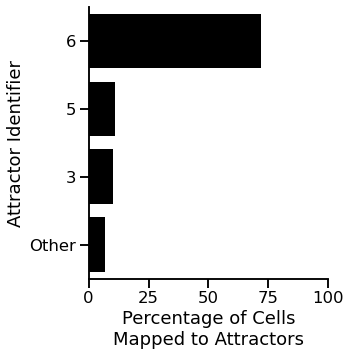

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

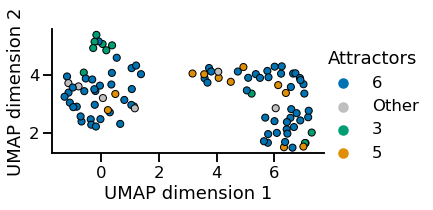

<Figure size 432x288 with 0 Axes>

In [9]:
scObject.makeAttractorAnalysisPlots(
    plottingData,
    distanceDF,
    allAttractors=True,
    numberOfAttractorsToShow=2,
    cmap="colorblind",
    makeFrequencyPlots=True,
    freqplotsFile="freqPlots_test.pdf",
    makeUMAP=True,
    umapFile="umapPlots_test.pdf",
)

#### Make UMAP and attractor frequency plots with a faceting variable

[6, 5, 3]


<Figure size 360x360 with 0 Axes>

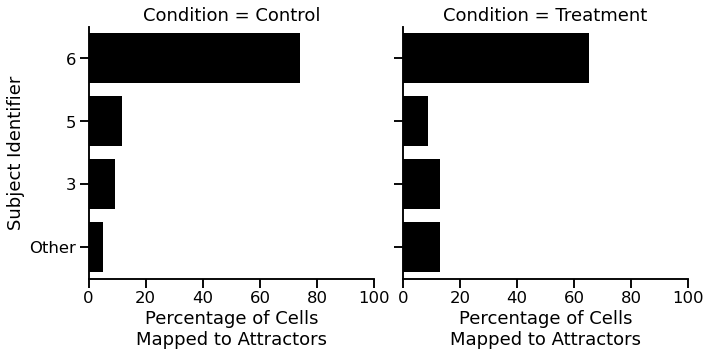

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

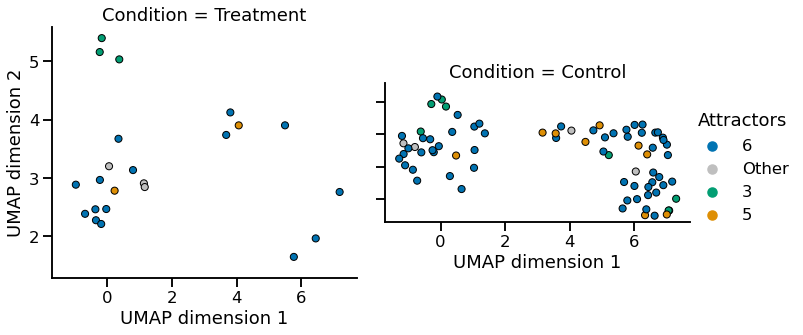

<Figure size 432x288 with 0 Axes>

In [10]:
scObject.makeAttractorAnalysisPlots(
    plottingData,
    distanceDF,
    allAttractors=True,
    numberOfAttractorsToShow=2,
    cmap="colorblind",
    makeFrequencyPlots=True,
    frequencyGrouping="Condition",
    freqplotsFile="freqPlots_test.pdf",
    makeUMAP=True,
    umapFile="umapPlots_test.pdf",
)

### Make heatmaps of attractors

#### Show all identified attractors that map to cells in the training dataset

Attractor cell counts: 
1 1
2 2
35 72
9 3
12 10
19 1
20 11


<Figure size 720x432 with 0 Axes>

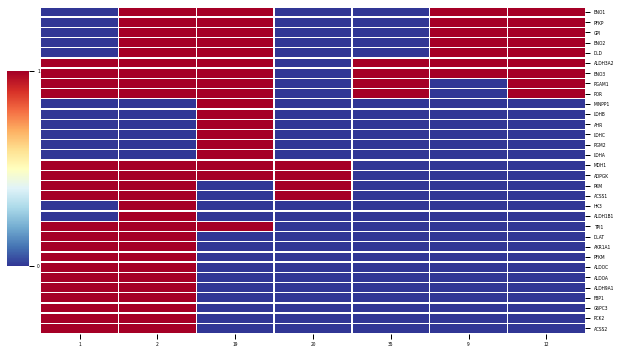

(         1   2   9   12  19  20  35
 HK3       0   1   0   0   0   0   0
 PCK2      1   1   0   0   0   0   0
 ACSS2     1   1   0   0   0   0   0
 MDH1      1   1   0   0   1   1   0
 TPI1      1   1   0   0   1   0   0
 ENO2      0   1   1   1   1   0   0
 G6PC3     1   1   0   0   0   0   0
 PGM2      0   0   0   0   1   0   0
 FBP1      1   1   0   0   0   0   0
 ALDH3A2   1   1   1   1   1   0   1
 ALDH9A1   1   1   0   0   0   0   0
 PGAM1     1   1   0   1   1   0   1
 POR       1   1   0   1   1   0   1
 ALDH1B1   0   1   0   0   0   0   0
 ALDOA     1   1   0   0   0   0   0
 ALDOC     1   1   0   0   0   0   0
 PFKM      1   1   0   0   0   0   0
 AKR1A1    1   1   0   0   0   0   0
 PKM       1   1   0   0   0   1   0
 DLAT      1   1   0   0   0   0   0
 ACSS1     1   1   0   0   0   1   0
 ADPGK     1   1   0   0   1   1   0
 DLD       0   1   1   1   1   0   0
 GPI       0   1   1   1   1   0   0
 PFKP      0   1   1   1   1   0   0
 ENO1      0   1   1   1   1   0   0
 

<Figure size 432x288 with 0 Axes>

In [11]:
scObject.makeAttractorHeatmaps(
    distanceDF=distanceDF,
    network="hsa00010.graphml",
    width=10,
    height=6,
    allAttractors=True,
)

#### Show only the top 3 attractors (ranked by the number of cells they map to)

Attractor cell counts: 
1 1
2 2
35 72
9 3
12 10
19 1
20 11


<Figure size 720x432 with 0 Axes>

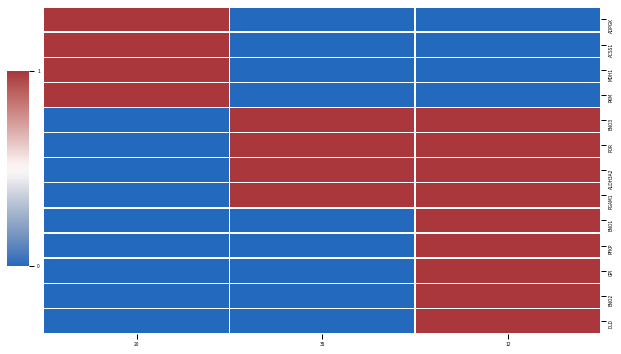

(         1   2   9   12  19  20  35
 HK3       0   1   0   0   0   0   0
 PCK2      1   1   0   0   0   0   0
 ACSS2     1   1   0   0   0   0   0
 MDH1      1   1   0   0   1   1   0
 TPI1      1   1   0   0   1   0   0
 ENO2      0   1   1   1   1   0   0
 G6PC3     1   1   0   0   0   0   0
 PGM2      0   0   0   0   1   0   0
 FBP1      1   1   0   0   0   0   0
 ALDH3A2   1   1   1   1   1   0   1
 ALDH9A1   1   1   0   0   0   0   0
 PGAM1     1   1   0   1   1   0   1
 POR       1   1   0   1   1   0   1
 ALDH1B1   0   1   0   0   0   0   0
 ALDOA     1   1   0   0   0   0   0
 ALDOC     1   1   0   0   0   0   0
 PFKM      1   1   0   0   0   0   0
 AKR1A1    1   1   0   0   0   0   0
 PKM       1   1   0   0   0   1   0
 DLAT      1   1   0   0   0   0   0
 ACSS1     1   1   0   0   0   1   0
 ADPGK     1   1   0   0   1   1   0
 DLD       0   1   1   1   1   0   0
 GPI       0   1   1   1   1   0   0
 PFKP      0   1   1   1   1   0   0
 ENO1      0   1   1   1   1   0   0
 

<Figure size 432x288 with 0 Axes>

In [14]:
scObject.makeAttractorHeatmaps(
    distanceDF=distanceDF,
    network="hsa00010.graphml",
    width=10,
    height=6,
    allAttractors=False,
    numberOfAttractorsToShow=3,
    cmap="vlag",
)